# Introduction:
### Key Indicators of Heart Disease
2020 annual CDC survey data of 400k adults related to their health status

### What topic does the dataset cover?
According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

### Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

# Objectives:
* Exploratory data analysis to get insights from the dataset
* Build a Machine Learning model to predict if an individual has Heart Disease

# Exploratory Data Analysis:

### Load Packages:

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load Data:

In [81]:
df = pd.read_csv("../data/heart_2020_cleaned.csv")
print("Number of observation: " + str(df.shape[0]))
print("Number of columns: " + str(df.shape[1]))

Number of observation: 319795
Number of columns: 18


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

* Only 4 of the features are numeric, rest are string

In [45]:
df.isnull().sum(axis=0)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

* It appears data is already cleaned up. We do not have any null values

In [46]:
y = df['HeartDisease']
X = df.drop(['HeartDisease'], axis=1)
X_categorical = X.select_dtypes(include='object')
X_numerical = X.select_dtypes(include=np.number)

#### Let's check relation between Heart Disease and other categorical variables

In [21]:
def plot_bar_chart(df, col, ax):
    df_col = df.groupby([col])['HeartDisease'].value_counts().unstack().reset_index()
    df_col.columns = [col, 'HeartDisease - No', 'HeartDisease - Yes']
    df_col['%HeartDisease -No'] =  df_col.apply(lambda x: round((x['HeartDisease - No']/(x['HeartDisease - No'] + x['HeartDisease - Yes']))*100,2), axis=1)
    df_col['%HeartDisease -Yes'] =  df_col.apply(lambda x: round((x['HeartDisease - Yes']/(x['HeartDisease - No'] + x['HeartDisease - Yes']))*100,2), axis=1)
    
#     print(df_col)
    
    labels = df_col[col].apply(lambda x: col + ' - ' + x)
    x = np.arange(len(labels))
    
    width=0.35
    
    if col == 'AgeCategory':
        degree =45
    else:
        degree = 0
    
#     fig, ax = plt.subplots(figsize=(10,6))
    
    rect1 = ax.bar(x-0.35/2, df_col['%HeartDisease -No'], width=width, label= 'HeartDisease - No')
    rect2 = ax.bar(x+0.35/2, df_col['%HeartDisease -Yes'], width=width, label= 'HeartDisease - Yes')
    
    ax.set_xticks(x)    
    ax.set_xticklabels(labels, rotation=degree)
    
    ax.bar_label(rect1, padding=3)
    ax.bar_label(rect2, padding=3)
    
    ax.legend()

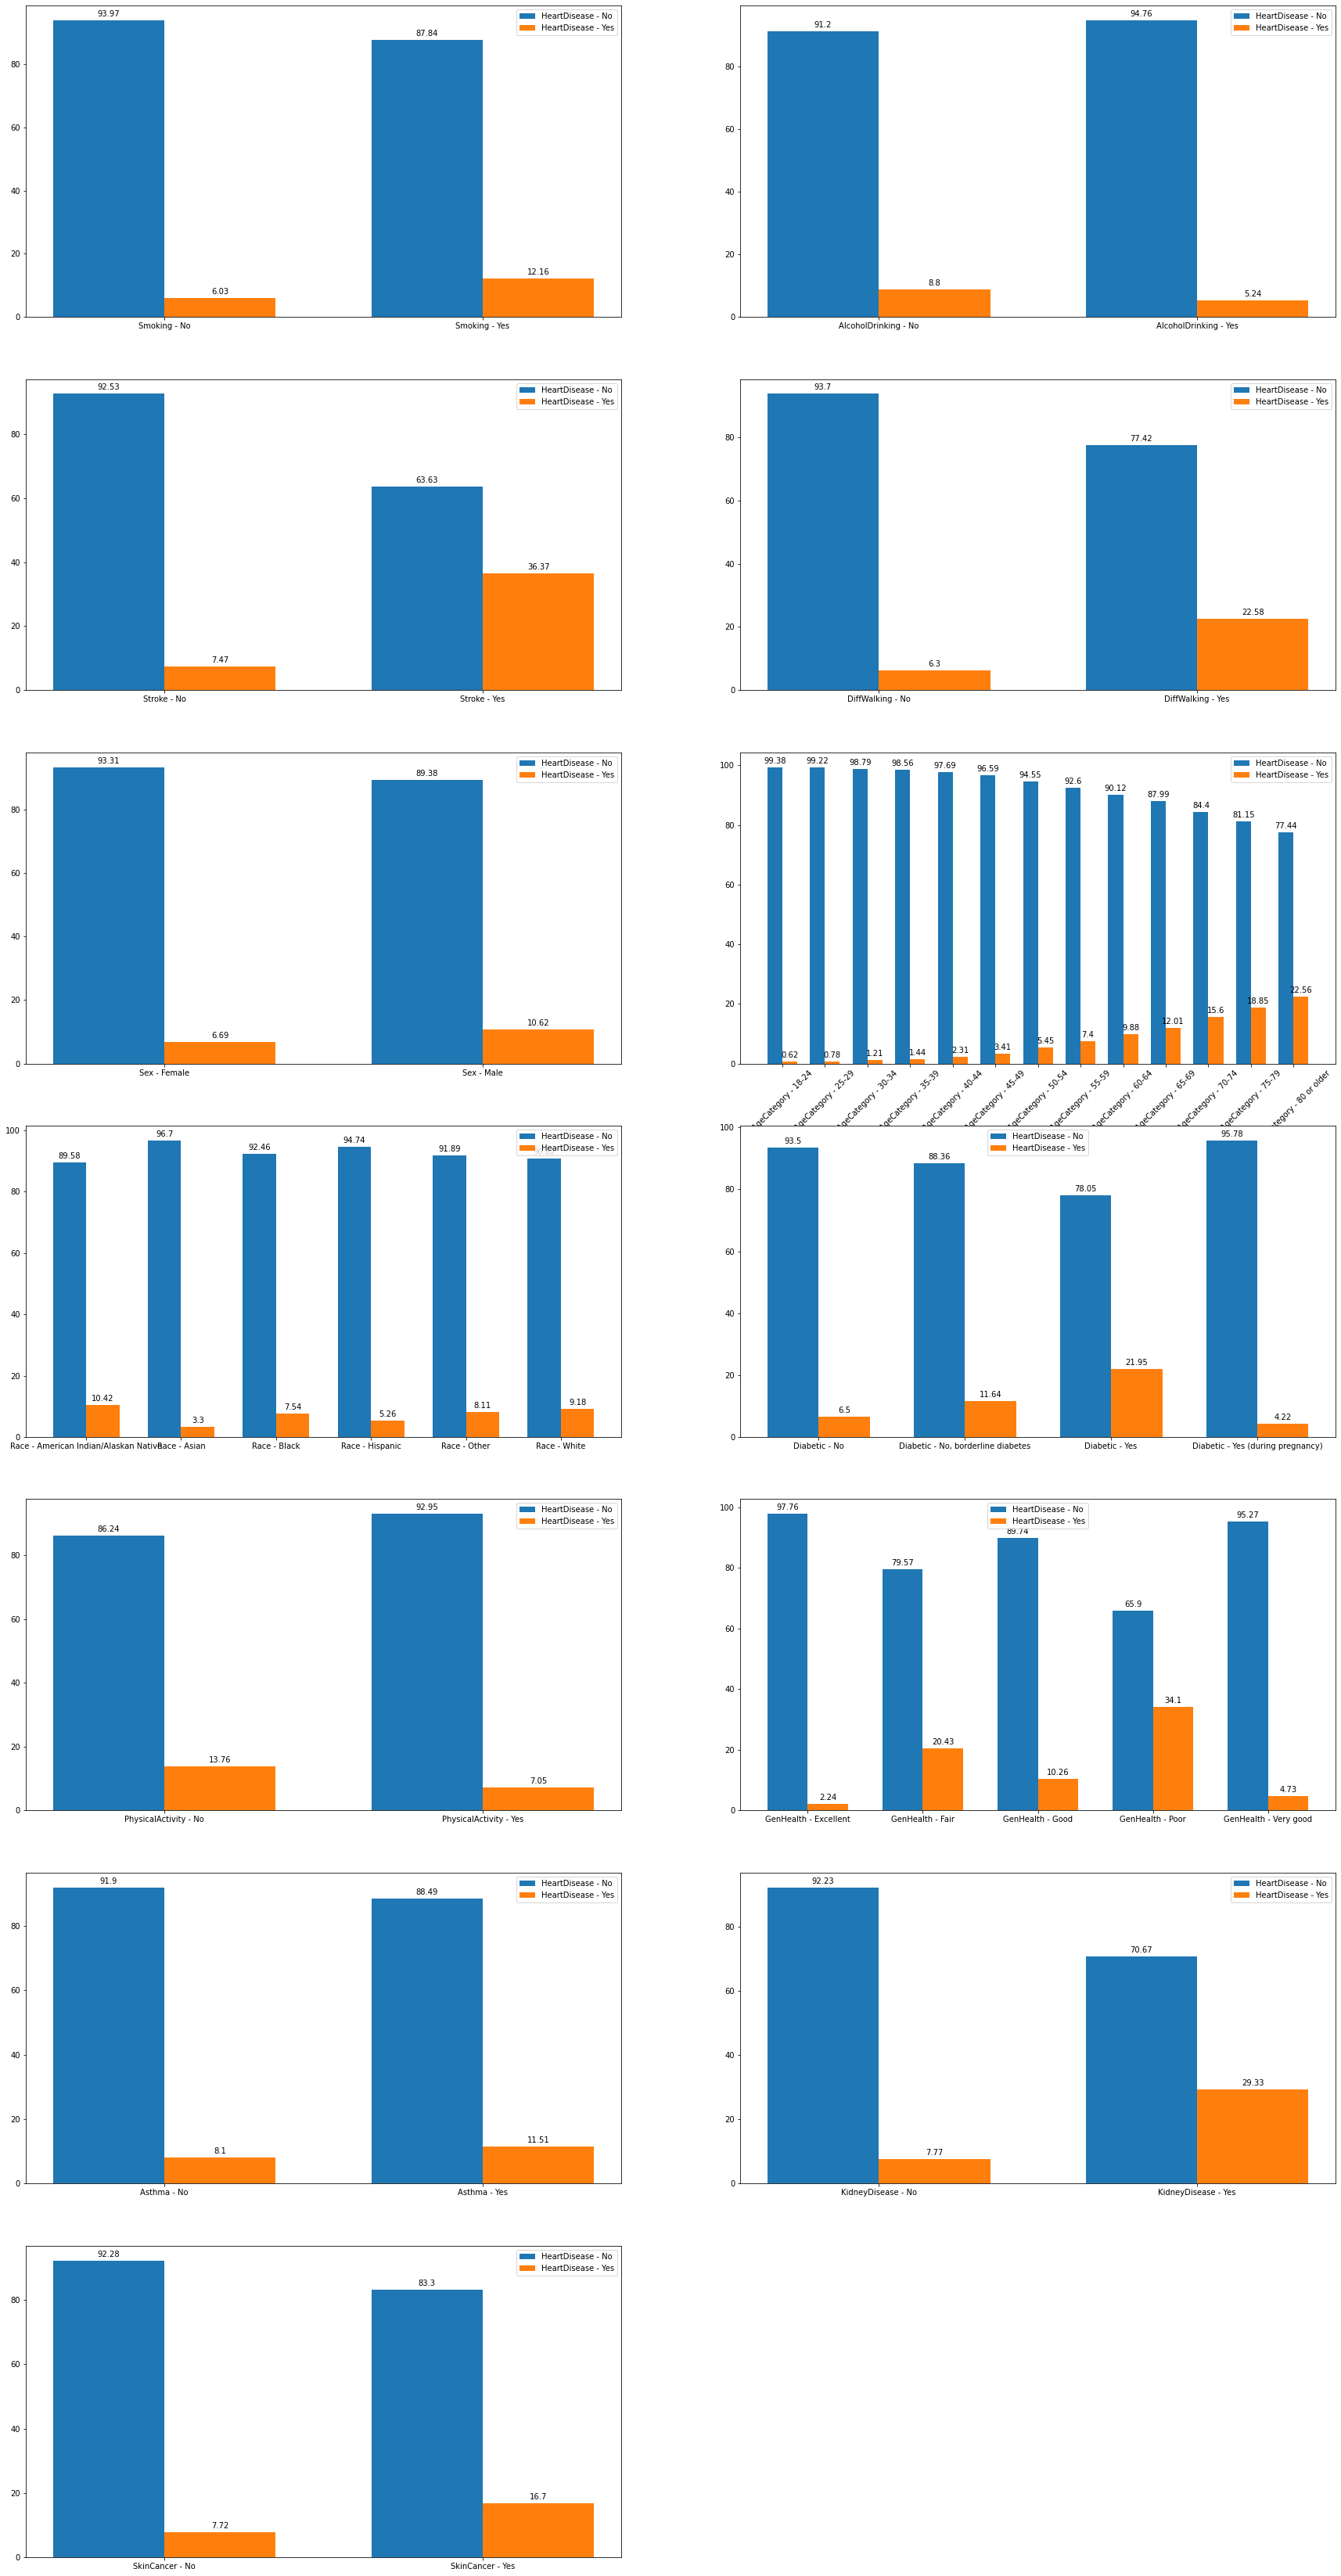

In [22]:
fig, axes = plt.subplots(7,2, figsize=(30,60))
cols = list(X_categorical.columns)

i = 0
j = 0
for col in cols:
    plot_bar_chart(df, col, axes[i,j])
    j += 1
    if j == 2:
        i += 1
        j = 0
fig.delaxes(axes[6,1])
plt.show()

### Let's look at some of the numerical features

In [48]:
for col in X_numerical:
    print(col)
    print(df.groupby(['HeartDisease']).agg(agg_col=(col,'median')))
    print(20*'*')

BMI
              agg_col
HeartDisease         
No              27.26
Yes             28.34
********************
PhysicalHealth
              agg_col
HeartDisease         
No                0.0
Yes               0.0
********************
MentalHealth
              agg_col
HeartDisease         
No                0.0
Yes               0.0
********************
SleepTime
              agg_col
HeartDisease         
No                7.0
Yes               7.0
********************


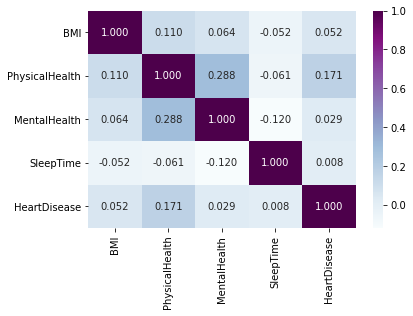

In [24]:
temp_df = X_numerical.copy()
temp_df['HeartDisease'] = y.apply(lambda x: 1 if x=='Yes' else 0)
sns.heatmap(temp_df.corr(), annot=True, fmt= '0.3f', cmap='BuPu')
plt.show()
del temp_df

# EDA Summary:
* Out of 320K observations, We have 30K observations with HeartDisease
* Smokers had slightly higher % of heart disease at 12.16% compared to 6.03% for non-smokers
* People who drank alcohol had slightly lower % of heart disease at 5.24% compared to 8.8% for those who drank alcohol. Is drinking alcohol good for your heart ???
* 36% of the people with a stroke had heart disease compared to 7% for those who did not have a stroke
* 23% of the people with difficulty in walking had heart disease compared to 6% for those who did not have difficulty walking
* 11% of the male participants had heart disease compared to 7% for female participants
* 23% of the participants, 80 and older had heart disease. Younger participants had much smaller of individuals with heart disease in their age bracket
* Percentage of participants with heart disease was highest for American Indians and Alaskan natives at 10%. Asians had the lowest percetage at 3%. 9% of the whites had heart disease
* Diabetic and border line diabetic had higher percetange of participants with heart disease at 22% and 12%, respectively
* A lower percentage of participants(7%) who were physically active had heart disease compared to 14% of those who were not physically active
* Participants with pool general health had highest percentage of individuals with heart disease
* 12% of participants with Asthma had heart disease compared to 8% for those who did not have asthma
* 30% of participants with Kidney disease also had heart disease compared to 8% for those who did not have Kidney disease
* 17% of participants with skin cancer also had heart disease compared to 8% for those who did not have skin cancer
* Heart disease is positively (although weakly) correlated with BMI (0.052), PhysicalHealth (0.171), MentalHealth (0.029) and SleepTime (0.008)

# Machine Learning Model:

We are going to build a classification model that is going to predict whether an individual has heart disease or not. It is very important to make sure that the dataset we are working with is a balanced dataset i.e. equal number of positive (Heart Disease - Yes) and negative (Heart Disease -No ) outcomes in the data. Lets check what we got!

In [25]:
df.groupby('HeartDisease').BMI.count()/df.shape[0]

HeartDisease
No     0.914405
Yes    0.085595
Name: BMI, dtype: float64

91% of the participants did not have heart disease while only 9% had heart disease. It means that if we build a model that would always predict "No Heart Disease" will be correct 91% of the time. High accuracy but not a good model. False negatives could be deadly when it comes to heart ailment. We could use a different metric to assess our model such as AUC-ROC curve that draws a plot between True Positive rate and False Positive rate. Higher the area under the curve, the better the model. I used this approach for loan data payoff modeling. Here, I will use oversampling of the under represented data i.e. +ve HeartDisease.

### Distribution of some of the numerical features

In [26]:
def plot_hist(df, col):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(df[col])
    ax.set_title("Distribution of " + col)
    plt.show()

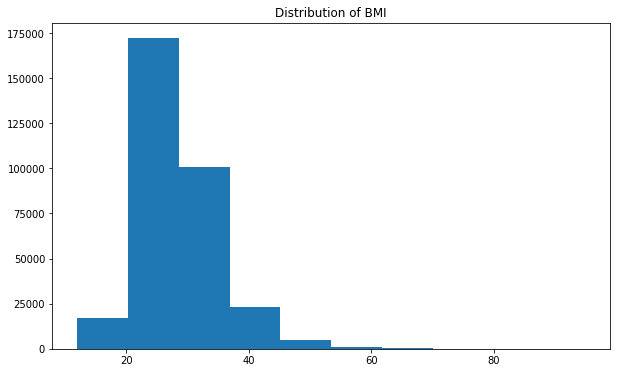

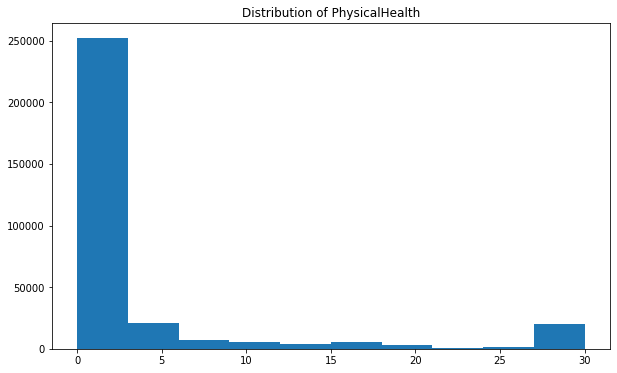

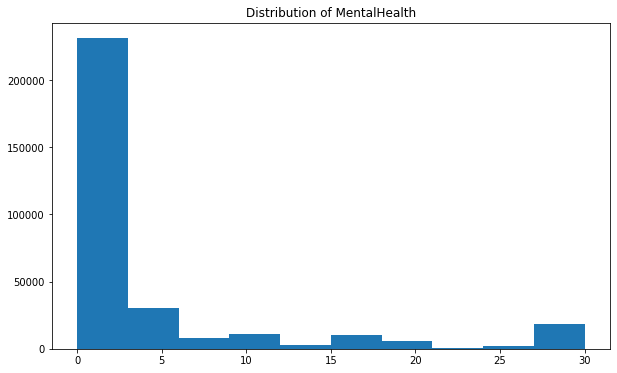

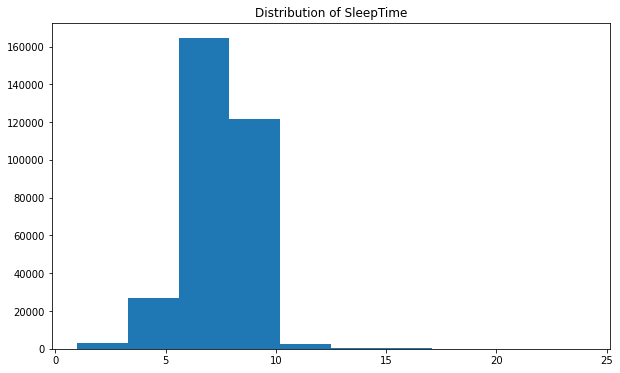

In [27]:
for col in X_numerical:
    plot_hist(df, col)

Distribution of BMI and SleepTime are somewhat normal but the other two features are skewed to the right. We will normalize the data prior to fitting

In [29]:
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from joblib import dump, load

In [30]:
y = [1 if x=='Yes' else 0 for x in y]

In [14]:
random_state = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y )

In [11]:
class CategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.select_dtypes(include='object')
    

class NumericalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()
        
    def fit(self, X, y= None):
        return self
    
    def transform(self, X, y=None):
        return X.select_dtypes(include=np.number)

In [12]:
pipeline_numerical = Pipeline(steps=
                                    [('numerical_features',NumericalFeatures()),
                                     ('std_scaler', StandardScaler())   
                                    ])
pipeline_categorical = Pipeline(steps=
                                      [('categorical_features',CategoricalFeatures()),
                                       ('OneHotEncoder',OneHotEncoder())   
                                      ])
feature_union = FeatureUnion(
                   [('numerical',pipeline_numerical),
                    ('categorical', pipeline_categorical)        
                    ])

In [31]:
results = []
def check_model_accuracy(name, model, param_grid):
    pipeline = Pipeline(steps=
                        [('SMOTE',SMOTENC(categorical_features=list(X.dtypes=='object'))),
                         ('PreProcessing',feature_union),
                         (model[0], model[1])
                        ]
                       )
    gs = GridSearchCV(pipeline, param_grid=param_grid, verbose=1, cv=3, scoring='roc_auc', error_score='raise')
    gs.fit(X_train, y_train)
    y_prob = gs.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test, y_prob)
    results.append([name, gs, auc_score])
    print("AUC score for " + name + ' is ' + str(auc_score))    

## RandomForestClassifier:

In [148]:
model = ('rf', RandomForestClassifier())
param_grid = {
               'rf__criterion': ['gini'],
               'rf__max_depth': [2],
               'rf__random_state': [random_state],
               'rf__n_estimators': [100]
            }
check_model_accuracy('RandomForestClassifier', model, param_grid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
AUC score for RandomForestClassifier is 0.7767059540603899


## GradientBoostingClassifier:

In [153]:
model = ('gboost', GradientBoostingClassifier())
param_grid = {
              'gboost__learning_rate': [0.01,0.1],
              'gboost__max_depth': [3, 5],
              'gboost__random_state': [random_state]
}
check_model_accuracy('GradientBoostingClassifier', model, param_grid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
AUC score for GradientBoostingClassifier is 0.8287166486758106


## XGBClassifier:

In [157]:
model = ('xgb', XGBClassifier())
param_grid = {
                'xgb__learning_rate': [0.05,0.1]
}
check_model_accuracy('XGBClassifier', model, param_grid)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
AUC score for XGBClassifier is 0.8271805523346458


## KNeighborsClassifiers:

In [160]:
model = ('KNN',KNeighborsClassifier())
param_grid = {
              "KNN__n_neighbors":[5, 10]
}
check_model_accuracy('KNN', model, param_grid)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
AUC score for KNN is 0.771334614339127


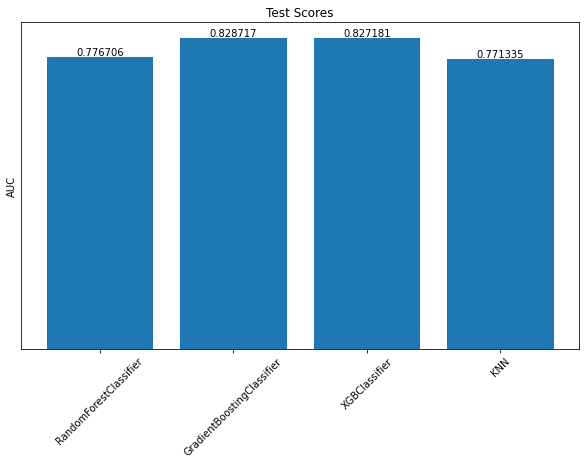

In [174]:
model_score = pd.DataFrame([[r[0], r[2]] for r in results], columns=['model', 'score'])
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(model_score.shape[0])
labels = model_score.model

rects = ax.bar(x, model_score.score)
ax.bar_label(rects)
ax.set_xticks(x)
ax.set_yticks([])
ax.set_ylabel("AUC")
ax.set_xticklabels(labels, rotation=45)
ax.set_title("Test Scores")
plt.savefig("result.png", dpi=1200, bbox_inches="tight")
plt.show()

* GradientBoosting Classifier performs the best with AUC score of 0.83

In [173]:
results[1][1].best_params_

{'gboost__learning_rate': 0.1,
 'gboost__max_depth': 3,
 'gboost__random_state': 7}

In [176]:
dump(results[1][1],"../model/heart_disease.pkl")

['model.pkl']

In [84]:
df[df.HeartDisease=='Yes']

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,Yes,38.45,No,No,Yes,30.0,15.0,Yes,Female,55-59,Hispanic,Yes,Yes,Poor,6.0,Yes,No,No
319767,Yes,36.21,Yes,No,No,0.0,0.0,Yes,Female,75-79,Hispanic,Yes,Yes,Good,8.0,No,No,No
319781,Yes,37.12,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,7.0,No,No,No
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
